In [1]:
NetID = "gowtham4"

# Part A: Parsing

In [2]:
# read in pf.log
with open('pf.log') as f:
    lines = f.readlines()

# strip all lines of whitespace
lines = [line.strip() for line in lines]


In [3]:
# parse each line into your data structure
# remember to convert addresses from strings to integers

"""  Dictionary to hold a list of backtraces for each pagefault 

key = tuple (pagefault details) -- Tuple
value = list (backtraces) -- 2D list

"""

parsed_lines = {}

i = 0
while(i<len(lines)):
    line = lines[i]
    if not (line[:2] == '</'):
        
        #parse main line
        pf_details = tuple(line.split(':'))
        i+=1        
        pf_backtraces = []
        
        # parse backtraces        
        while(i< len(lines) and lines[i][:2] == '</'):
            library, off_adr = lines[i].split('+')
            offset,address = off_adr.split('/')
            pf_backtraces.append([library,str(int(address.rstrip('>'),16)),str(int(offset,16))])
            i+=1
             
        parsed_lines[pf_details] = pf_backtraces
        
        

In [47]:
#[print(v) for i, v in enumerate(parsed_lines.items()) if i < 5]    

for i, v in enumerate(parsed_lines.items()):
    if (i<5):
        print(v)
        
    else:
        break

(('1506816069251', 'firefox', '13179', '0x282235aae', 'R', 'minor', '50'), [['</usr/lib/x86_64-linux-gnu/libcairo.so.2.11400.10', '16727808', '686943'], ['</lib/x86_64-linux-gnu/libglib-2.0.so.0.5400.1', '16748032', '660132'], ['</lib/x86_64-linux-gnu/libpthread-2.26.so', '16746496', '483292'], ['</usr/lib/x86_64-linux-gnu/libX11.so.6.3.0', '16748800', '108902'], ['</lib/x86_64-linux-gnu/libc-2.26.so', '16767232', '7501']])
(('1506816074664', 'firefox', '13179', '0x10fb420b4', 'W', 'minor', '23'), [['</lib/x86_64-linux-gnu/libglib-2.0.so.0.5400.1', '16657664', '64606'], ['</usr/lib/x86_64-linux-gnu/libxcb.so.1.1.0', '16756992', '607425'], ['</lib/x86_64-linux-gnu/libpthread-2.26.so', '16759296', '459484'], ['</lib/x86_64-linux-gnu/libc-2.26.so', '16723456', '528024'], ['</usr/lib/x86_64-linux-gnu/libgdk-x11-2.0.so.0.2400.31', '16689664', '40592'], ['</usr/lib/x86_64-linux-gnu/libX11.so.6.3.0', '16659456', '385253'], ['</usr/lib/x86_64-linux-gnu/libcairo.so.2.11400.10', '16731648', '161

In [5]:
# write your data structure out to pf.csv
# include an index column with unique indices for each page fault
with open('pf.csv', 'w') as f:
    # write header line
    f.write('\t'.join(['index', 'time', 'proc_name', 'pid', 'pfaddr', 'rw', 'major_minor', 'resolve_time', 'lib', 'addr', 'offset']))
    f.write('\n')
    
    for index, key in enumerate(parsed_lines):
        
        # we will append backtrace values later
        csv_entry = [str(index+1)]+ list(key)       
        backtraces = parsed_lines[key]
        
        # write all backtraces with a single key
        for backt in backtraces:
            
            f.write('\t'.join(csv_entry + backt))
            f.write('\n')
        
    
    # write each page fault & backtrace entry
    # hint: take a look at python's enumerate() function to generate indices
    # Remember that indices should be unique to each page fault



# Part B: Analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [7]:
# relevant options when reading in pf.csv: sep, parse_dates
df = pd.read_csv('pf.csv', sep = '\t', parse_dates = [1])
# set the index of the data frame
df['time'] = pd.to_datetime(df['time'],unit='ms') # epoch time is in milliseconds
df.set_index('time', inplace=True)

In [8]:

df.sort_index(inplace=True)
print(df.index,'\n\n')
print("Answer (B.a):  Time Range : {0} to {1}".format(df.index[0],df.index[-1]))

DatetimeIndex(['2017-10-01 00:01:09.251000', '2017-10-01 00:01:09.251000',
               '2017-10-01 00:01:09.251000', '2017-10-01 00:01:09.251000',
               '2017-10-01 00:01:09.251000', '2017-10-01 00:01:14.664000',
               '2017-10-01 00:01:14.664000', '2017-10-01 00:01:14.664000',
               '2017-10-01 00:01:14.664000', '2017-10-01 00:01:14.664000',
               ...
               '2018-01-07 18:56:37.930000', '2018-01-07 18:56:37.930000',
               '2018-01-07 18:56:37.930000', '2018-01-07 18:56:37.930000',
               '2018-01-07 18:56:37.930000', '2018-01-07 18:56:37.930000',
               '2018-01-07 18:57:45.990000', '2018-01-07 18:59:50.839000',
               '2018-01-07 18:59:50.839000', '2018-01-07 18:59:50.839000'],
              dtype='datetime64[ns]', name='time', length=2809731, freq=None) 


Answer (B.a):  Time Range : 2017-10-01 00:01:09.251000 to 2018-01-07 18:59:50.839000


In [9]:
print('Answer (B.b) Unique Processes:')
uniq_proc = df.proc_name.unique()
print(uniq_proc)
print(len(uniq_proc))

print('Number of counts for each unique process for each')
df.groupby('proc_name').pid.count() # Also df.groupby('proc_name').pid.count().sum() == df['index'].count().sum() 

Answer (B.b) Unique Processes:
['firefox' 'thunderbird' 'watchdog' 'auditd' 'subl' 'gitlab-runner' 'sshd'
 'google-chrome' 'bash' 'tmux' 'xorg' 'htop']
12
Number of counts for each unique process for each


proc_name
auditd           228982
bash             229904
firefox          233452
gitlab-runner    218405
google-chrome    238107
htop             232215
sshd             246903
subl             245982
thunderbird      237590
tmux             219329
watchdog         234938
xorg             243924
Name: pid, dtype: int64

Answer (B.c): Major - Minor bar plots


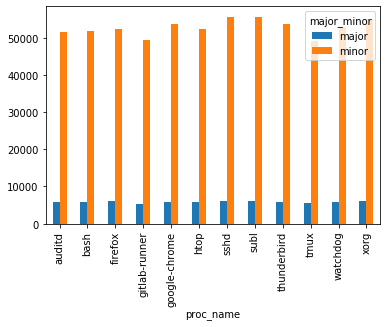

In [46]:
print('Answer (B.c): Major - Minor bar plots')

maj_min = df.groupby(['proc_name','index','major_minor'])['major_minor'].nunique()#.reset_index().set_index('proc_name')
num_errors_type = maj_min.groupby(['proc_name','major_minor']).count().unstack()
num_errors_type.plot.bar()

In [45]:
print('Answer (B.d): Histograms separated by type of pagefault')
d = df.groupby(['proc_name','index','major_minor']).nunique()

df_minor = df[df['major_minor'] == 'minor']
df_major = df[df['major_minor'] == 'major']

Answer (B.d): Histograms separated by type of pagefault


# Part C: Making Predictions

In [12]:
df.head()

,index,proc_name,pid,pfaddr,rw,major_minor,resolve_time,lib,addr,offset
time,,,,,,,,,,
2017-10-01 00:01:09.251,1,firefox,13179,0x282235aae,R,minor,50,</usr/lib/x86_64-linux-gnu/libcairo.so.2.11400.10,16727808,686943
2017-10-01 00:01:09.251,1,firefox,13179,0x282235aae,R,minor,50,</lib/x86_64-linux-gnu/libglib-2.0.so.0.5400.1,16748032,660132
2017-10-01 00:01:09.251,1,firefox,13179,0x282235aae,R,minor,50,</lib/x86_64-linux-gnu/libpthread-2.26.so,16746496,483292
2017-10-01 00:01:09.251,1,firefox,13179,0x282235aae,R,minor,50,</usr/lib/x86_64-linux-gnu/libX11.so.6.3.0,16748800,108902
2017-10-01 00:01:09.251,1,firefox,13179,0x282235aae,R,minor,50,</lib/x86_64-linux-gnu/libc-2.26.so,16767232,7501


In [44]:
maj_min.head()

index  proc_name  pid  pfaddr  rw  major_minor  \
proc_name index major_minor                                                   
auditd    6     minor            1          1    1       1   1            1   
          8     minor            1          1    1       1   1            1   
          11    minor            1          1    1       1   1            1   
          12    minor            1          1    1       1   1            1   
          15    minor            1          1    1       1   1            1   

                             resolve_time  lib  addr  offset  
proc_name index major_minor                                   
auditd    6     minor                   1    7     7       7  
          8     minor                   1    1     1       1  
          11    minor                   1    6     6       6  
          12    minor                   1    5     5       5  
          15    minor                   1    1     1       1